# **What is the most optimal skill to learn for Data Analysts?**

# Methodology

**1. Group skills to determine median salary and likelihood of being in posting.**

**2. Visualize media salary vs percent skill demand.**

**3. Determine if certain technologies are more prevalent.**

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Advanced visualization
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Further Cleanup: job_Skills to list datatype
df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\james\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Feb 25 16:15:38 2025).


In [2]:
df_DA_US = df[(df['job_title'] == "Data Analyst") & (df['job_country'] =="United States")].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [10]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count * 100

skill_percent = 6

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


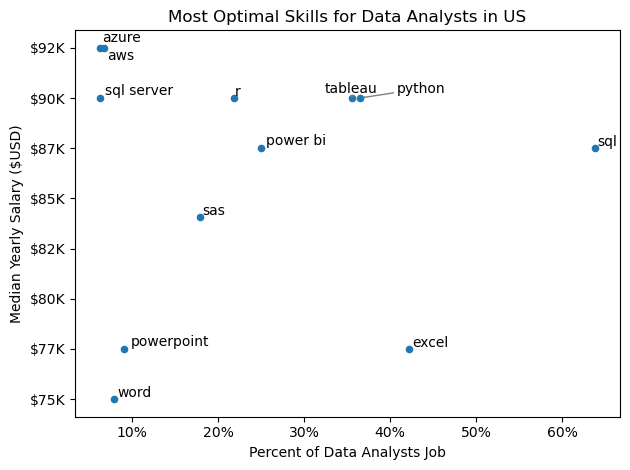

In [16]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(
                kind='scatter',
                x='skill_percent',
                y='median_salary'
                )
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Most Optimal Skills for Data Analysts in US')
plt.xlabel('Percent of Data Analysts Job')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()
plt.show()

# Integrating Prevalent Technologies to the plot

In [20]:
# Integrating corresponding skills technology

df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [21]:
df_technology = df['job_type_skills'].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove NaN values
df_technology = df_technology.dropna()

# Combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)    # Convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# Remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['tableau',
  'splunk',
  'excel',
  'qlik',
  'sharepoint',
  'esquisse',
  'powerpoint',
  'sas',
  'microstrategy',
  'dax',
  'ms access',
  'spss',
  'spreadsheet',
  'cognos',
  'outlook',
  'word',
  'powerbi',
  'msaccess',
  'ssis',
  'looker',
  'visio',
  'sheets',
  'sap',
  'alteryx',
  'datarobot',
  'nuix',
  'power bi',
  'ssrs'],
 'programming': ['matlab',
  'objective-c',
  'pascal',
  'vb.net',
  'haskell',
  'java',
  'r',
  'php',
  'nosql',
  'scala',
  'c',
  'no-sql',
  'sas',
  'groovy',
  'shell',
  'kotlin',
  'assembly',
  'sql',
  'f#',
  'javascript',
  'sass',
  'powershell',
  'c++',
  'go',
  'html',
  'lisp',
  'visualbasic',
  't-sql',
  'apl',
  'rust',
  'swift',
  'mongo',
  'crystal',
  'solidity',
  'visual basic',
  'css',
  'c#',
  'perl',
  'ocaml',
  'clojure',
  'typescript',
  'elixir',
  'cobol',
  'golang',
  'bash',
  'fortran',
  'delphi',
  'lua',
  'julia',
  'dart',
  'erlang',
  'vba',
  'ruby',
  'python',
  'mong

In [22]:
pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

,technology,skills
0,analyst_tools,"[tableau, splunk, excel, qlik, sharepoint, esq..."
1,programming,"[matlab, objective-c, pascal, vb.net, haskell,..."
2,cloud,"[firebase, azure, snowflake, vmware, digitaloc..."
3,libraries,"[hugging face, dplyr, capacitor, gtx, xamarin,..."
4,other,"[docker, kubernetes, bitbucket, npm, codecommi..."
5,databases,"[redis, firebase, firestore, neo4j, couchbase,..."
6,os,"[arch, suse, linux, unix, windows, fedora, deb..."
7,async,"[airtable, trello, monday.com, jira, clickup, ..."
8,webframeworks,"[node.js, deno, laravel, django, next.js, svel..."
9,sync,"[twilio, zoom, symphony, microsoft teams, ring..."


In [23]:
# Exploding out the skills column

df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,tableau
0,analyst_tools,splunk
0,analyst_tools,excel
0,analyst_tools,qlik
0,analyst_tools,sharepoint
...,...,...
9,sync,slack
9,sync,google chat
9,sync,wire
9,sync,webex


In [25]:
# Merging the technology dataframe with the high demand skills dataframe

df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,714,87500.0,63.864043,programming,sql
1,472,77500.0,42.218247,analyst_tools,excel
2,408,90000.0,36.493739,programming,python
3,398,90000.0,35.599284,analyst_tools,tableau
4,279,87500.0,24.955277,analyst_tools,power bi
5,244,90000.0,21.824687,programming,r
6,200,84078.5,17.889088,analyst_tools,sas
7,200,84078.5,17.889088,programming,sas
8,102,77500.0,9.123435,analyst_tools,powerpoint
9,89,75000.0,7.960644,analyst_tools,word


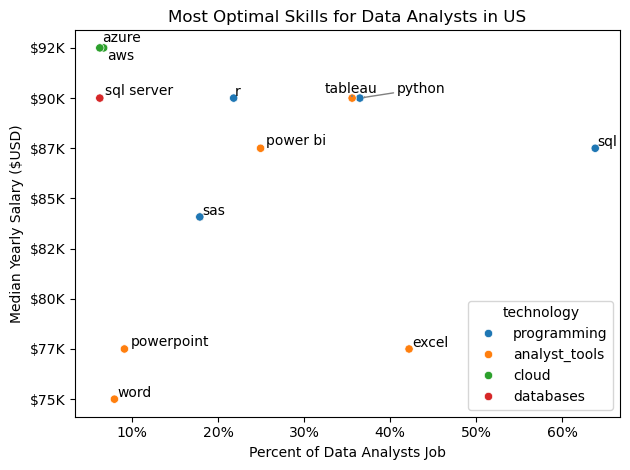

In [29]:
from adjustText import adjust_text

""" df_DA_skills_high_demand.plot(
                kind='scatter',
                x='skill_percent',
                y='median_salary'
                ) """
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
    )

# Prepare texts for adjusTment
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Most Optimal Skills for Data Analysts in US')
plt.xlabel('Percent of Data Analysts Job')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()
plt.show()